In [3]:
import numpy as np
from Simulation import simulate
from Models import diffusion_advection
from matplotlib import pyplot as plt

In [2]:
# Generate posterior csvs or read them in in the following cell
posterior = np.genfromtxt('Posterior/log_adaptive_4.csv',delimiter=',',skip_header=1)
Cell_Count_U = 4e8
Cell_Count_L = 6.25e9
inits = np.array([Cell_Count_U, 0, 0, 1.3e3, Cell_Count_L, 0, 0, 0, 0])
ts = np.linspace(0,10,1001)
posterior_predictive = np.zeros((1000,1001))
peak_height = np.zeros(1000)

for i in range(len(posterior)):
    theta = posterior[i]
    p = [theta[0], theta[1], 4, 2, 5.2, theta[2], theta[3], theta[4], 20, 0.56*2.8e-6 / 7, 0.27 / 7, theta[5], theta[6]]
    results = simulate.solve_model(diffusion_advection.model, inits, ts, (p,))
    posterior_predictive[i,:] = results[:,3]
    peak_height[i] = ts[np.argmax(results[:,3])]

np.savetxt('Results/post_predictive_adaptive.csv',posterior_predictive,delimiter=',')
np.savetxt('Results/peak_time_adaptive.csv',peak_height,delimiter=',')

In [65]:
# Find indices where peak height is before 4 days
np.savetxt('Results/early_peak_indices.csv',np.where(peak_height < 4),delimiter=',')
np.savetxt('Results/late_peak_indices.csv',np.where(peak_height >= 4),delimiter=',')

In [4]:
posterior = np.genfromtxt('Results/post_predictive_adaptive.csv',delimiter=',')
peak_height = np.genfromtxt('Results/peak_time_adaptive.csv',delimiter=',')
theta = [4.06592024e-07,3.67348515e-07,2.98121572e-01,9.64152015e-02,3.45915087e-03,2.12885021e-01,1.47334705e-01]
Cell_Count_U = 4e8
Cell_Count_L = 6.25e9
ts = np.linspace(0, 10, 1001)
inits = np.array([Cell_Count_U, 0, 0, 1.3e3, Cell_Count_L, 0, 0, 0, 0])
p = [theta[0], theta[1], 4, 2, 5.2, theta[2], theta[3], theta[4], 20, 0.56*2.8e-6 / 7, 0.27 / 7, theta[5], theta[6]]
results = simulate.solve_model(diffusion_advection.model, inits, ts, (p,))

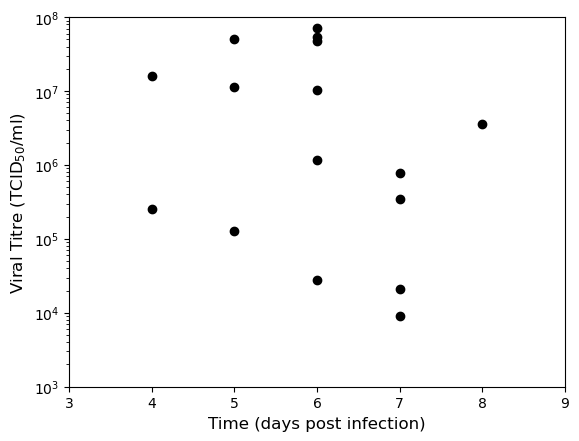

In [6]:
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,7.68,7.85,7.73,7.01,6.073,4.45,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.scatter(data_days, data,color='k')
ax.set_xlim((3,9))
ax.set_yscale('log')
ax.set_ylim((10**3,10**8))
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/dataset.pdf",dpi=2400,bbox_inches='tight')
plt.show()

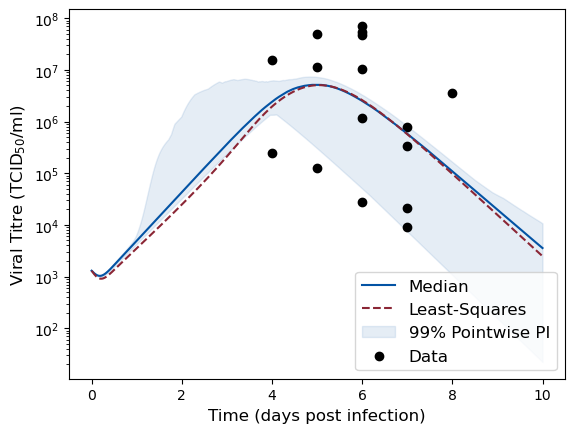

In [7]:
ci_u = np.percentile(posterior,axis=0,q=99.5)
ci_l = np.percentile(posterior,axis=0,q=0.05)
med = np.percentile(posterior,axis=0,q=50)
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,7.68,7.85,7.73,7.01,6.073,4.45,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.semilogy(ts,med,label="Median",color='#0353A4')
ax.semilogy(ts,results[:,3],label="Least-Squares",linestyle='--',color='#8B2635')
ax.fill_between(ts, (ci_l), (ci_u), color='#0353A4', alpha=.1,label="99% Pointwise PI")
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/VU_posterior_adaptive.pdf",dpi=2400,bbox_inches='tight')
plt.show()

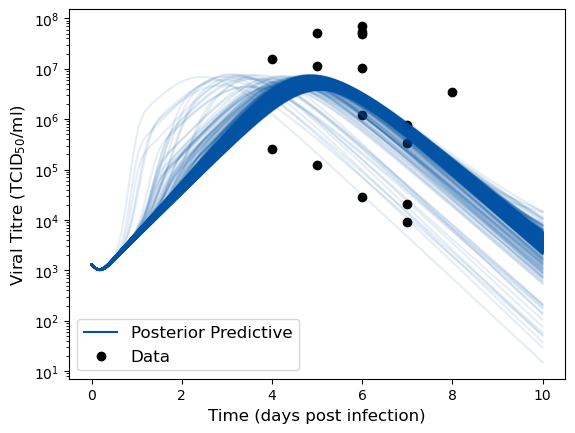

In [4]:
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,7.68,7.85,7.73,7.01,6.073,4.45,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.semilogy(ts,posterior[0,:],label="Posterior Predictive",color='#0353A4')
for i in range(1,1000):
    ax.semilogy(ts,posterior[i,:],alpha=0.1,color='#0353A4')
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/VU_posterior_adaptive_trajectories.pdf",dpi=2400,bbox_inches='tight')
plt.show()

In [5]:
dies = np.genfromtxt('Results/Deaths_lower_mort.csv')
dies = np.array([bool(i) for i in dies])
survive = dies == 0
posterior_survive = posterior[survive]
posterior_die = posterior[dies]

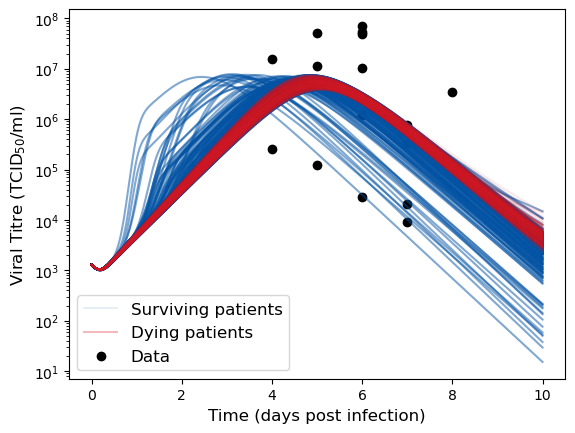

In [8]:
fig, ax = plt.subplots()
ax.semilogy(ts, posterior_survive[0],color='#0353A4',alpha=0.1,label='Surviving patients')
ax.semilogy(ts, posterior_die[0],color='#D51623',alpha=0.3,label='Dying patients')
for post in posterior_survive:
    ax.semilogy(ts, post,color='#0353A4',alpha=0.5)
for post in posterior_die:
    ax.semilogy(ts, post,color='#D51623',alpha=0.1)
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/VU_posterior_lower_mort_survival.pdf",dpi=2400,bbox_inches='tight')
plt.show()

In [9]:
posterior_predictive_both = np.zeros((1000,1001))
peak_height_both = np.zeros(1000)

for i in range(len(posterior)):
    theta = posterior[i]
    p = [theta[0], theta[1], 4, 2, 5.2, theta[2], theta[3], theta[4], 20, 0.56*2.8e-6 / 7, 0.27 / 7, theta[5], theta[6]]
    results = simulate.solve_model(diffusion_advection.model, inits, ts, (p,))
    posterior_predictive_both[i,:] = results[:,3] + results[:,7]
    peak_height_both[i] = ts[np.argmax(results[:,3]+results[:,7])]

In [10]:
post_multi_peak = posterior_predictive_both[np.where(peak_height_both < 3)]
post_later_peak = posterior_predictive_both[np.where(peak_height_both >= 3)]

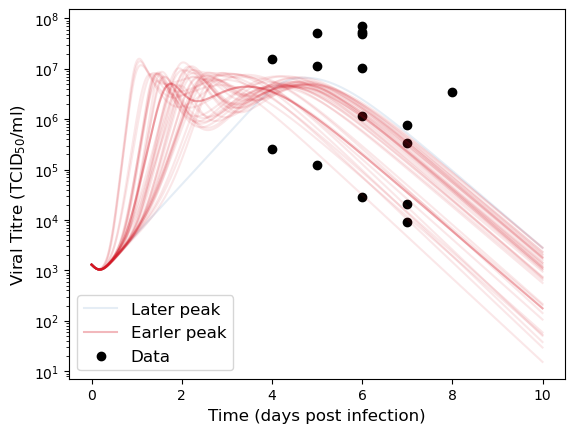

In [15]:
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,7.68,7.85,7.73,7.01,6.073,4.45,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.semilogy(ts, post_later_peak[0],color='#0353A4',alpha=0.1,label='Later peak')
ax.semilogy(ts, post_multi_peak[0],color='#D51623',alpha=0.3,label='Earler peak')
# for post in post_later_peak:
    # ax.semilogy(ts, post,color='#0353A4',alpha=0.1)
for post in post_multi_peak:
    ax.semilogy(ts, post,color='#D51623',alpha=0.1)
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
# plt.savefig("Plots/VU_posterior_adaptive_times_both.pdf",dpi=2400,bbox_inches='tight')
plt.show()

In [ ]:
posterior_survive = posterior[not(dies)]
med = np.percentile(posterior,axis=0,q=50)
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,7.68,7.85,7.73,7.01,6.073,4.45,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.semilogy(ts,med,label="Median",color='#0353A4')
ax.semilogy(ts,results[:,3],label="Least-Squares",linestyle='--',color='#8B2635')
ax.fill_between(ts, (ci_l), (ci_u), color='#0353A4', alpha=.1,label="99% Pointwise PI")
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
# plt.savefig("Plots/VU_posterior_adaptive.pdf",dpi=2400,bbox_inches='tight')
plt.show()

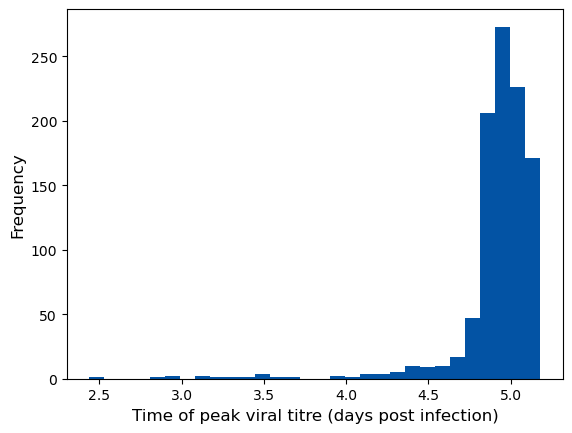

In [4]:
fig, ax = plt.subplots()
ax.hist(peak_height,bins=30,color="#0353A4")
ax.set_xlabel("Time of peak viral titre (days post infection)",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
plt.savefig("Plots/peak_time_posterior_adaptive.pdf",dpi=2400,bbox_inches='tight')
plt.show()